# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Curso Bônus - Data Science e Machine Learning com Linguagem Julia</font>

## <font color='blue'>Introdução à Linguagem Julia</font>

![title](imagens/julia.png)

> Análise Estatística

In [1]:
import Pkg

In [2]:
Pkg.add("Distributions")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [3]:
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [4]:
Pkg.add("PyPlot")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [5]:
using Statistics, Printf, Dates, LinearAlgebra, DelimitedFiles, Distributions

In [6]:
using Plots
pyplot(size=(600,400))
gr(size=(480,320))
default(fmt = :png)

In [7]:
dados = readlines("dados/dataset.csv")[1:5]

5-element Vector{String}:
 "data,risk_free_rate_mercado,risk_free_rate,ganho"
 "197901,4.18,0.77,10.96"
 "197902,-3.41,0.73,-2.09"
 "197903,5.75,0.81,11.71"
 "197904,0.05,0.8,3.27"

In [8]:
typeof(dados)

Vector{String} (alias for Array{String, 1})

In [9]:
df = readdlm("dados/dataset.csv", ',', skipstart = 1) 

388×4 Matrix{Float64}:
 197901.0   4.18  0.77   10.96
 197902.0  -3.41  0.73   -2.09
 197903.0   5.75  0.81   11.71
 197904.0   0.05  0.8     3.27
 197905.0  -2.18  0.82   -1.89
 197906.0   3.88  0.81    7.4
 197907.0   0.73  0.77    1.77
 197908.0   5.7   0.77    9.32
 197909.0  -0.69  0.83   -0.04
 197910.0  -8.14  0.87  -10.56
 197911.0   5.37  0.99    9.25
 197912.0   1.87  0.95   12.14
 198001.0   5.76  0.8    15.28
      ⋮                 
 201005.0  -8.0   0.01   -9.64
 201006.0  -5.21  0.01   -7.77
 201007.0   7.1   0.01    5.54
 201008.0  -4.4   0.01   -7.37
 201009.0   9.24  0.01   12.01
 201010.0   3.88  0.01    5.69
 201011.0   0.56  0.01    0.47
 201012.0   6.77  0.01   11.28
 201101.0   2.01  0.01   -0.38
 201102.0   3.85  0.01    1.43
 201103.0   0.28  0.01    1.92
 201104.0   2.82  0.0     1.03

In [10]:
typeof(df)

Matrix{Float64} (alias for Array{Float64, 2})

In [11]:
println("\nPrimeiras Linhas do df:")
df[1:4,:]


Primeiras Linhas do df:


4×4 Matrix{Float64}:
 197901.0   4.18  0.77  10.96
 197902.0  -3.41  0.73  -2.09
 197903.0   5.75  0.81  11.71
 197904.0   0.05  0.8    3.27

In [12]:
# ym = ano_mes
ym = round.(Int, df[:,1]) 

388-element Vector{Int64}:
 197901
 197902
 197903
 197904
 197905
 197906
 197907
 197908
 197909
 197910
 197911
 197912
 198001
      ⋮
 201005
 201006
 201007
 201008
 201009
 201010
 201011
 201012
 201101
 201102
 201103
 201104

In [13]:
# Descrição:
# Rme = Taxa de Retorno do Mercado (%)
# Rf = Taxa de Retorno Real Sem Risco (%)
# R = Taxa de Retorno
(Rme, Rf, R) = (df[:,2], df[:,3], df[:,4])

([4.18, -3.41, 5.75, 0.05, -2.18, 3.88, 0.73, 5.7, -0.69, -8.14  …  7.1, -4.4, 9.24, 3.88, 0.56, 6.77, 2.01, 3.85, 0.28, 2.82], [0.77, 0.73, 0.81, 0.8, 0.82, 0.81, 0.77, 0.77, 0.83, 0.87  …  0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0], [10.96, -2.09, 11.71, 3.27, -1.89, 7.4, 1.77, 9.32, -0.04, -10.56  …  5.54, -7.37, 12.01, 5.69, 0.47, 11.28, -0.38, 1.43, 1.92, 1.03])

In [14]:
# Retorno Real
Re  = R - Rf 

388-element Vector{Float64}:
  10.190000000000001
  -2.82
  10.9
   2.4699999999999998
  -2.71
   6.59
   1.0
   8.55
  -0.87
 -11.43
   8.26
  11.190000000000001
  14.479999999999999
   ⋮
  -9.65
  -7.779999999999999
   5.53
  -7.38
  12.0
   5.680000000000001
   0.45999999999999996
  11.27
  -0.39
   1.42
   1.91
   1.03

In [15]:
# Formata a string
dN = Date.(string.(ym), "yyyymm") 

388-element Vector{Date}:
 1979-01-01
 1979-02-01
 1979-03-01
 1979-04-01
 1979-05-01
 1979-06-01
 1979-07-01
 1979-08-01
 1979-09-01
 1979-10-01
 1979-11-01
 1979-12-01
 1980-01-01
 ⋮
 2010-05-01
 2010-06-01
 2010-07-01
 2010-08-01
 2010-09-01
 2010-10-01
 2010-11-01
 2010-12-01
 2011-01-01
 2011-02-01
 2011-03-01
 2011-04-01

In [16]:
println("Primeiras Linhas de Rme e Re")
[dN[1:4] Rme[1:4,:] Re[1:4,:]]

Primeiras Linhas de Rme e Re


4×3 Matrix{Any}:
 1979-01-01   4.18  10.19
 1979-02-01  -3.41  -2.82
 1979-03-01   5.75  10.9
 1979-04-01   0.05   2.47

In [17]:
μ = mean([Rme Re], dims = 1)  

1×2 Matrix{Float64}:
 0.601881  0.30299

In [18]:
σ = std([Rme Re], dims = 1) 

1×2 Matrix{Float64}:
 4.60401  8.57178

In [19]:
println("\n","cov([Rme Re]): ")
cov([Rme Re])


cov([Rme Re]): 


2×2 Matrix{Float64}:
 21.1969  28.4261
 28.4261  73.4754

In [20]:
println("\n","cor([Rme Re]): ")
cor([Rme Re])


cor([Rme Re]): 


2×2 Matrix{Float64}:
 1.0       0.720294
 0.720294  1.0

> Regressão Linear

Equação:
$
y_t = x_t'b + u_t
$

O primeiro coeficiente $b$ é o intercepto e o segundo coeficiente $u$ é o slope.

In [21]:
# Prepara os dados
c = ones(size(Rme, 1))         
x = [c Rme]                  
y = copy(Re)                  

388-element Vector{Float64}:
  10.190000000000001
  -2.82
  10.9
   2.4699999999999998
  -2.71
   6.59
   1.0
   8.55
  -0.87
 -11.43
   8.26
  11.190000000000001
  14.479999999999999
   ⋮
  -9.65
  -7.779999999999999
   5.53
  -7.38
  12.0
   5.680000000000001
   0.45999999999999996
  11.27
  -0.39
   1.42
   1.91
   1.03

In [22]:
# Calcula os coeficientes
b2 = inv(x'x)*x'y              
b  = x\y                      
u  = y - x*b                   

388-element Vector{Float64}:
  5.088579265788081
  2.2571384842590034
  3.6931328925338835
  2.907110171227462
  0.7176486504356525
  1.8908938594035307
  0.5251970923657722
  1.410185324803125
  0.5594861688122427
 -0.00970142307070887
  1.5627313777801213
  9.186401636627057
  7.259722406080034
  ⋮
  1.5825517665754116
 -0.28897395404828696
 -3.487282778735648
 -0.9752233568100062
  0.11287312014079554
  0.9808938594035315
  0.21317536208119459
  2.6952632742413485
 -2.581345173726821
 -3.2388746812349245
  2.0386689827889493
 -2.24759457648854

In [23]:
# Coeficiente de determninação para avaliar o modelo
R2 = 1 - var(u)/var(y)   

0.5188230592449327

In [24]:
println("Resultado da Regressão Linear:")
println("R²: ", R2) 
println("Número de Observações: ", size(Re,1))

Resultado da Regressão Linear:
R²: 0.5188230592449327
Número de Observações: 388


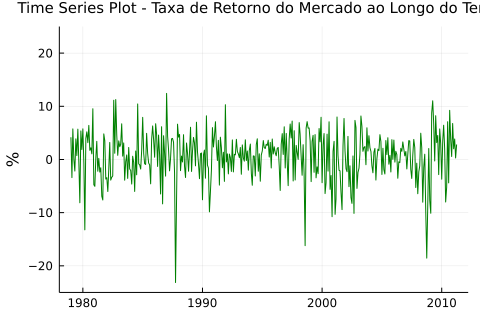

In [25]:
# Time Series Plot 
xTicksLoc = [Date(1980), Date(1990), Date(2000), Date(2010)]

xTicksLab = Dates.format.(xTicksLoc, "Y")

p1 = plot( dN,
           Rme,
           linecolor = :green,
           legend = false,
           xticks = (xTicksLoc, xTicksLab),
           ylim = (-25,25),
           title = "Time Series Plot - Taxa de Retorno do Mercado ao Longo do Tempo",
           titlefont = font(10),
           ylabel = "%" )
display(p1)

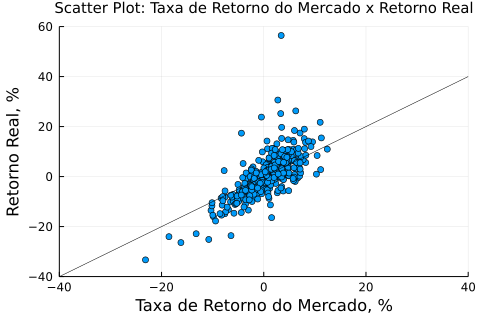

In [26]:
# Scatter Plot
p1 = scatter( Rme,
              Re,
              fillcolor = :blue,
              legend = false,
              xlim = (-40,40),
              ylim = (-40,60),
              title = "Scatter Plot: Taxa de Retorno do Mercado x Retorno Real",
              titlefont = font(10),
              xlabel = "Taxa de Retorno do Mercado, %",
              ylabel = "Retorno Real, %")
plot!([-40;60], [-40;60], color = :black, linewidth = 0.5)   
display(p1)

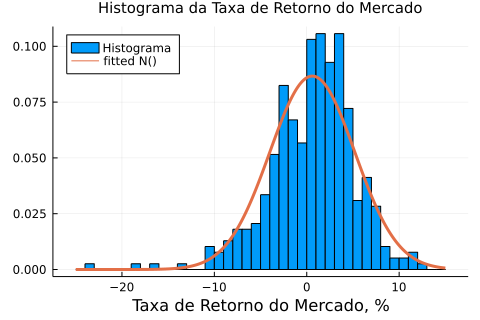

In [27]:
# Histograma
xGrid = -25:0.1:15
pdfX  = pdf.(Normal(mean(Rme), std(Rme)), xGrid) 

p1 = histogram( Rme,
                bins = -25:1:15,
                normalized = true,     
                label = "Histograma",
                title = "Histograma da Taxa de Retorno do Mercado",
                titlefont = font(10),
                xlabel = "Taxa de Retorno do Mercado, %",
                legend = :topleft)  
plot!(xGrid, pdfX, linewidth = 3, label = "fitted N()")
display(p1)

# Fim